In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn import neighbors, metrics, cross_validation, grid_search, linear_model
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

In [2]:
# URL to dataset
dataUrl = 'https://raw.githubusercontent.com/kug3lblitz/Heat-Replay/master/src/data/final/final.csv'

# Load the dataset
df = pd.read_csv(dataUrl)

In [3]:
# Check head
df.head(10)

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_term,most_used_freq,curses,total_curses,reading_score,sentiment,charted
0,1961,1960,36,72,65,158,34,30,10,70,rose,7,0,0,2.367848,0.9885,0
1,1961,1960,45,91,74,197,45,37,19,81,name,6,0,0,2.771777,0.9712,1
2,1961,1960,54,103,88,223,45,48,17,98,babi,10,0,0,3.885650,0.9971,1
3,1961,1960,42,148,66,263,81,61,36,76,love,24,0,0,2.889886,0.9993,1
4,1961,1960,28,131,60,354,56,77,5,57,come,38,0,0,2.940000,0.9812,1
5,1961,1960,50,105,79,181,39,40,24,80,mari,13,0,0,3.135470,0.9789,1
6,1961,1960,39,75,70,160,28,35,21,81,take,13,0,0,3.503750,0.9978,1
7,1961,1960,50,94,78,190,62,17,8,83,never,6,0,0,3.074737,-0.9081,1
8,1961,1960,53,63,92,166,25,41,18,105,one,4,0,0,4.993855,0.2533,1
9,1961,1960,48,57,79,124,29,24,7,83,river,5,0,0,4.648387,-0.3400,1


In [4]:
# Basic descriptions of the distribution of the data
# df.describe()

In [5]:
# # Get pair plot for major features of the dataset
# sns.pairplot(
#     df[
#         ['year',
#          'reading_score', 
#          'density_raw', 
#          'unique_words_raw', 
#          'density',
#          'unique_words',
#          'total_curses', 
#          'sentiment', 
#          'charted']
#     ]
# )

In [6]:
df.drop(['most_used_term'], axis=1, inplace=True)

# Set features to use
features = list(df)
features.remove('charted')
features.remove('year')

In [7]:
# Set target variable name
target = 'charted'

# Set X and y
X = df[features]
y = df[target]

In [8]:
# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Random forests

In [9]:
from sklearn import ensemble, tree

# Instantiate model using default params
tm = tree.DecisionTreeClassifier()

# Train model on training set
tm.fit(X_train, y_train)

# Evaluate accuracy of model on test set
print "Accuracy: %0.3f" % tm.score(X_test, y_test)

# Evaluate ROC AUC score of model on test set
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test, tm.predict_proba(X_test)[:,1])

Accuracy: 0.738
ROC AUC: 0.729


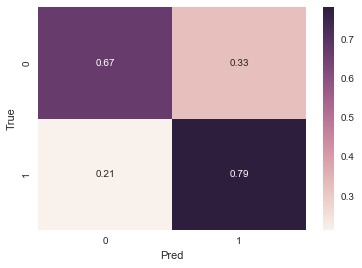

Confusion Matrix:
[[443 216]
 [194 709]]


In [10]:
# Get confusion matrix on test set
y_pred = tm.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

In [11]:
# Evaluate model on train set
print "Accuracy: %0.3f" % tm.score(X_train, y_train)

# Evaluate model on test set
print "Accuracy: %0.3f" % tm.score(X_test, y_test)

Accuracy: 1.000
Accuracy: 0.738


In [12]:
# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=20)

# Train model on training set
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Best Params:
{'n_estimators': 128}
Accuracy of current model: 0.802
Accuracy using best param: 0.804
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy of current model: 0.802
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=128, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy of updated model: 0.816


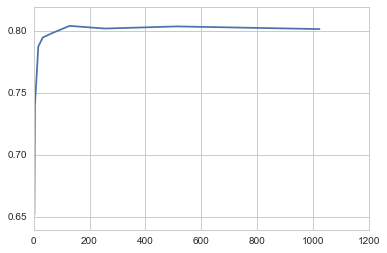

In [13]:
# Set list of values to grid search over
n = [np.power(2, i+1) for i in range(10)]
params = {'n_estimators': n}

# Perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(),
    param_grid=params)
gs.fit(X_train, y_train)

# Get best value to use
print "Best Params:"
print gs.best_params_

# Get improvement
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test)
print "Accuracy using best param: %0.3f" % gs.best_score_

# Plot scores
plt.plot(n, [s[1] for s in gs.grid_scores_])



# Current model params
print rf
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test)

# Update model params
rf.set_params(n_estimators=gs.best_params_['n_estimators'])

# Retrain model on new params
rf.fit(X_train, y_train)

# Updated model params
print rf
print "Accuracy of updated model: %0.3f" % rf.score(X_test, y_test)

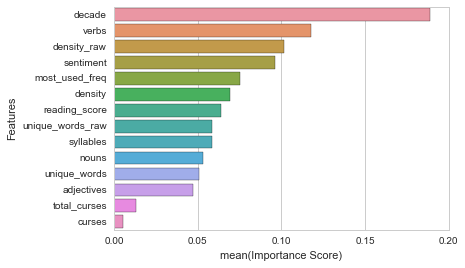

In [14]:
# Plot importances for all features
features = X.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)

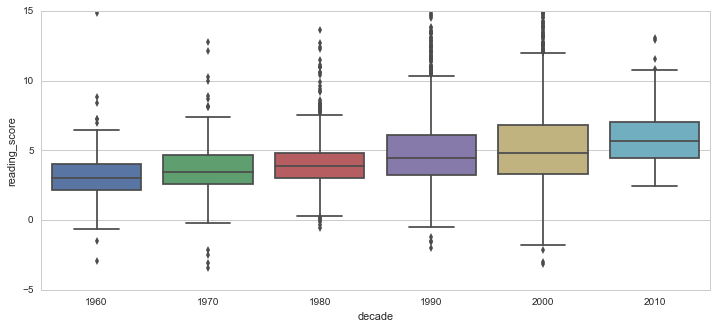

In [15]:
# Drop the invalid outliers

df_copy = df[df['reading_score']>-3.4]
df_copy = df[df['reading_score']<=15.0]

fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(df_copy['decade'], df_copy['reading_score'], ax=ax)

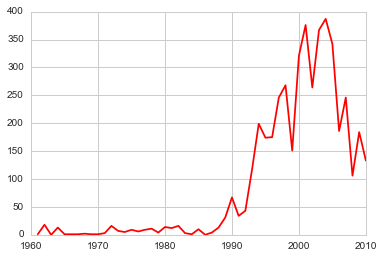

In [16]:
# Quick time series of the unnormalized reading score data points

year = set(df['year'])

# Plot the mean of the reading scores
x, y = zip(
    *sorted(
        (
            xVal, np.sum(
                [
                    yVal for av, yVal in zip(
                        df['year'], df['total_curses']
                    ) if xVal==av
                ]
            )
        ) for xVal in year
    )
)

plt.plot(x, y, 'r-')

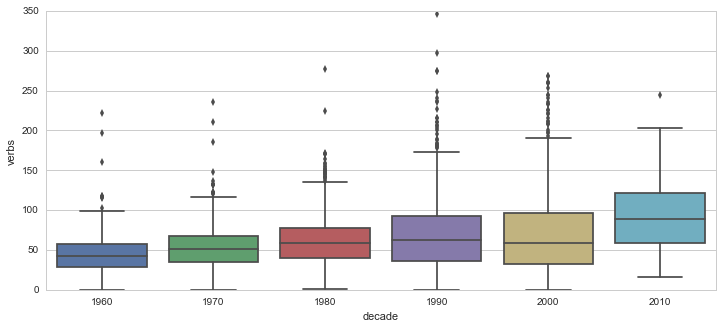

In [17]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(df['decade'], df['verbs'], ax=ax)